In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import img_as_float
from skimage import io, color, morphology



In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


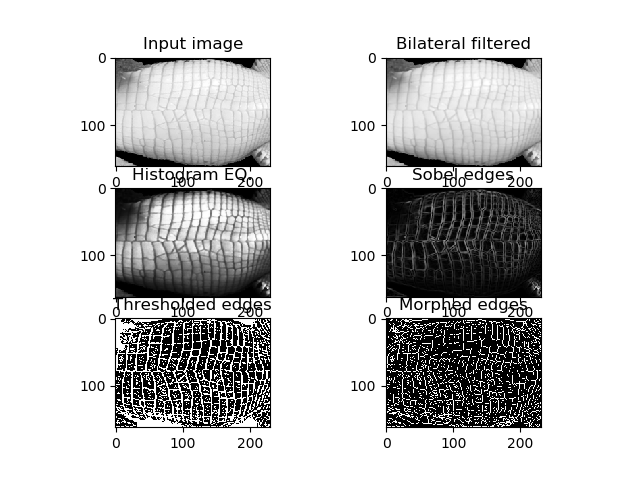

In [4]:
img = cv2.imread('input.png',0)

plt.figure(1)

plt.subplot(3,2,1)
plt.title('Input image')
plt.imshow(img,'gray')

img_blf = cv2.bilateralFilter(img,3,20,20)

plt.subplot(3,2,2)
plt.title('Bilateral filtered')
plt.imshow(img_blf,'gray')

img_eq = cv2.equalizeHist(img_blf)

plt.subplot(3,2,3)
plt.title('Histogram EQ.')
plt.imshow(img_eq,'gray')

img_lap = cv2.Laplacian(img_eq,cv2.CV_8U)

sobel_wx = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])

sobel_wy = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])

sobel_gradient_x = signal.convolve2d(img_eq, sobel_wx, mode='same', boundary='fill', fillvalue=0)
sobel_gradient_y = signal.convolve2d(img_eq, sobel_wy, mode='same', boundary='fill', fillvalue=0)
sobel_output = np.sqrt(np.power(sobel_gradient_x, 2) + np.power(sobel_gradient_y, 2))

plt.subplot(3,2,4)
plt.title('Sobel edges')
plt.imshow(sobel_output,'gray')

img_edges = cv2.adaptiveThreshold(img_lap.astype(np.uint8),255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

plt.subplot(3,2,5)
plt.title('Thresholded edges')
plt.imshow(img_edges,'gray')

img_clean = morphology.thin(img_edges)

plt.subplot(3,2,6)
plt.title('Morphed edges')
plt.imshow(img_clean,'gray')

In [4]:
cv2.imwrite('lines.png',img_clean*255)

True